In [41]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
import sweetviz as sv
from pandas_profiling import ProfileReport

In [50]:
mp = pd.read_csv('~/Desktop/To_prediction/Metaphlan4_all_pheno.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,k__Bacteria,p__Firmicutes,p__Bacteroidetes,p__Proteobacteria,p__Actinobacteria,c__Clostridia,c__Bacteroidia,c__Negativicutes,c__Firmicutes_unclassified,c__Betaproteobacteria,...,t__SGB47656,t__SGB14139,t__SGB1890,s__Prevotella_sp_DNF00663,s__Collinsella_SGB14747,t__SGB3322,t__SGB14747,t__SGB4194,t__SGB6499,t__SGB4510
External ID,,,,,,,,,,,,,,,,,,,,,
PSM7J14T,100.00000,71.02855,26.85212,1.89661,0.22272,55.95542,26.85212,12.28881,2.64634,0.98112,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM79HOL,100.00000,34.80297,63.49096,1.49113,0.21495,30.54465,63.49096,2.56962,0.32024,1.44817,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM67U9D,100.00000,54.68728,44.23327,0.82266,0.25679,50.51548,44.23327,2.28682,0.51562,0.73302,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
MSM6J2MF,100.00000,96.47442,0.24335,3.10878,0.16437,82.71787,0.24335,13.23502,0.51562,0.73302,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
HSM7J4N4,100.00000,27.30707,71.32484,1.35394,0.01415,25.32084,71.32484,1.39104,0.44382,0.01219,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSMA26BL,100.00000,36.18427,61.89923,1.72077,0.19572,34.43199,61.89923,1.54756,0.03789,1.05422,...,0.01596,0.00765,0.00649,0.02668,0.01905,0.02668,0.01905,0.21992,0.02074,0.01415
MSM79H9A,99.84673,36.69046,58.88541,0.98279,0.58879,33.53007,58.88541,0.38769,0.00567,0.04974,...,0.01596,0.00765,0.00649,0.02668,0.01905,0.02668,0.01905,0.21992,0.02074,0.01415
HSM7J4KK,100.00000,33.89929,62.37670,1.84729,0.81156,31.61819,62.23758,0.55590,0.16380,0.93262,...,0.01596,0.00765,0.00649,0.02668,0.01905,0.02668,0.01905,0.21992,0.02074,0.01415


In [51]:
select_sampels = pd.read_csv('~/Desktop/selected_samples_MGX.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)

In [65]:
mp = mp.loc[select_sampels.index,:]
mp = mp.loc[:,mp.columns.str.startswith('s__')]
mp["diagnosis"] = select_sampels.iloc[:,-1]
# mp.reset_index(inplace=True)

features = mp.iloc[:, 1:-1]
targets = mp.iloc[:, -1]

Best Model:
RandomForestClassifier(max_features=3, min_samples_split=5, n_estimators=3,
                       random_state=42)
{'s__Victivallales_bacterium': 0.18806123552958998}
Accuracy 90.48%


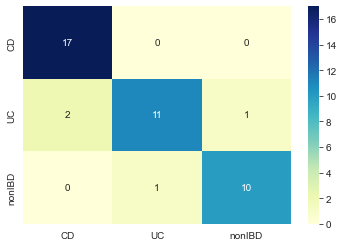

In [66]:
MGX_X = features
MGX_y = targets

#fill NA's
MGX_X.fillna(MGX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MGX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MGX_y, test_size=0.50, random_state=42)

n_estimators_RF = [3] #[5, 10, 25, 50, 100]
max_features_RF = [3] #[2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}
RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=42)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')
RF_clf.fit(X_train, y_train)
print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)
RF_predictions = RF_model.predict(X_test)
##########################################################################
imp_df = pd.DataFrame({
"": features.columns,
"feature_importances": RF_clf.best_estimator_.feature_importances_
})
feature_importances = imp_df.sort_values(by="feature_importances", ascending=False).rename(columns={"":"feature_name"})
##########################################################################
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)
##########################################################################
dominant_species = dict(zip(feature_importances.feature_name.iloc[:1], feature_importances.feature_importances.iloc[:1]))
features = mp.drop(list(dominant_species.keys()), axis=1) # Highest feature remove
print(dominant_species)
print(f'Accuracy {round(metrics.accuracy_score(y_test, RF_predictions) * 100, 2)}%')


In [54]:
dominant_species = dict(zip(feature_importances.feature_name.iloc[:1], feature_importances.feature_importances.iloc[:1]))
# features = features.drop(list(dominant_species.keys()), axis=1) # Highest feature remove
